In [31]:
file_path = 'C:/heart.csv'
data = pd.read_csv(file_path)

# Просмотрим данные чтобы понять их структуру
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Accuracy = 0.8032786885245902
Precision= 0.7692307692307693
Recall= 0.9090909090909091
Conf matrix= [[19  9]
 [ 3 30]]
ROC AUC= 0.8658008658008658


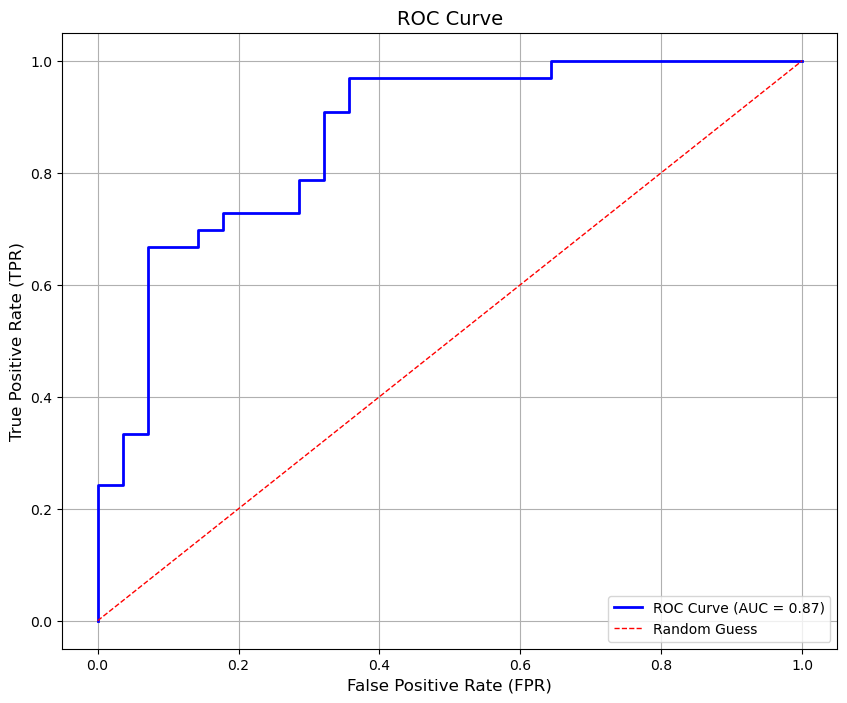

In [49]:
import pandas as pd # для обработки и анализа

# для обучения модели
from sklearn.model_selection import train_test_split

# модель логистической регрессии
from sklearn.linear_model import LogisticRegression

# метрики
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix, 
    roc_curve, roc_auc_score
)

file_path = 'C:/heart.csv'
data = pd.read_csv(file_path)

# Разделим данные на признаки (X) и целевой признак (y)
X = data.drop(columns=['output'])
y = data['output']

# Разделим данные на тренировочную и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Создадим и обучим модель логистической регрессии
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Рассчитаем метрики качества
# Точность правильных предсказаний от общего числа, отображающая общую эффективность моделей
accuracy = accuracy_score(y_test, y_pred)

# Доля истинных положительных предсказаний
precision = precision_score(y_test, y_pred)

# Полнота истинных положительных результатов среди фактических положительных случаев
recall = recall_score(y_test, y_pred)

# матрица ошибок
# 00 - истинное отрицательные значения
# 01 - ложные положительные значения
# 10 - ложные отрицательные
# 11 - истинное положительные
conf_matrix = confusion_matrix(y_test, y_pred)

# Площадь под ROC-кривой для отображения способности модели различать классы
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Построим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Выводим результаты метрик
print("Accuracy =", accuracy)
print("Precision=",precision)
print("Recall=", recall)
print("Conf matrix=", conf_matrix)
print("ROC AUC=", roc_auc)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue', linewidth=2)

# красный пунктир - случайные предсказания (случайная модель) для наглядности отображения
plt.plot([0, 1], [0, 1], '--', label='Random Guess', linewidth=1, color='red')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()